In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics
import missingno as msno
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

I will begin by importing the train and test data, adding a column that differentiates between both sets, concatenating the two data sets, cleaning the data, and adding transformations and dummy variables as needed.

I will then split the data into train and test before creating a model

# Data Import

In [411]:
# import train data
house_train = pd.read_csv('../datasets/train.csv')
house_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [412]:
# import test data
house_test = pd.read_csv('../datasets/test.csv')
house_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [413]:
# add column to differentiate between train (1) and test (0) data sets
house_train['data_type'] = 1
house_test['data_type'] = 0

In [414]:
# concatenate the data to clean/transform as needed
frames = [house_train, house_test]
df = pd.concat(frames)

In [415]:
# check that data was concatenated correctly
print(house_train.shape)
print(house_test.shape)
print(df.shape)
print(house_train.shape[0] + house_test.shape[0] == df.shape[0])

(2051, 82)
(878, 81)
(2929, 82)
True


In [416]:
# check datatypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2929 non-null   int64  
 1   PID              2929 non-null   int64  
 2   MS SubClass      2929 non-null   int64  
 3   MS Zoning        2929 non-null   object 
 4   Lot Frontage     2439 non-null   float64
 5   Lot Area         2929 non-null   int64  
 6   Street           2929 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2929 non-null   object 
 9   Land Contour     2929 non-null   object 
 10  Utilities        2929 non-null   object 
 11  Lot Config       2929 non-null   object 
 12  Land Slope       2929 non-null   object 
 13  Neighborhood     2929 non-null   object 
 14  Condition 1      2929 non-null   object 
 15  Condition 2      2929 non-null   object 
 16  Bldg Type        2929 non-null   object 
 17  House Style    

In [417]:
# check summary statistics
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,data_type
count,2929.000000,2.929000e+03,2929.000000,2439.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2906.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2051.000000,2929.000000
mean,1465.255377,7.143984e+08,57.386480,69.199672,10137.697849,6.093547,5.563332,1971.344145,1984.258450,101.669649,...,47.411062,23.019461,2.593377,16.007511,2.244111,50.652441,6.214749,2007.790714,181469.701609,0.700239
std,846.003265,1.887291e+08,42.645278,23.337677,7861.902406,1.409420,1.111678,30.243350,20.859235,178.724156,...,67.168919,64.148601,25.145578,56.096167,35.603235,566.440219,2.714055,1.316757,79258.659352,0.458231
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000
25%,733.000000,5.284770e+08,20.000000,58.000000,7440.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000,0.000000
50%,1465.000000,5.354532e+08,50.000000,68.000000,9434.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000,1.000000
75%,2198.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000,1.000000


# Cleaning Data and EDA

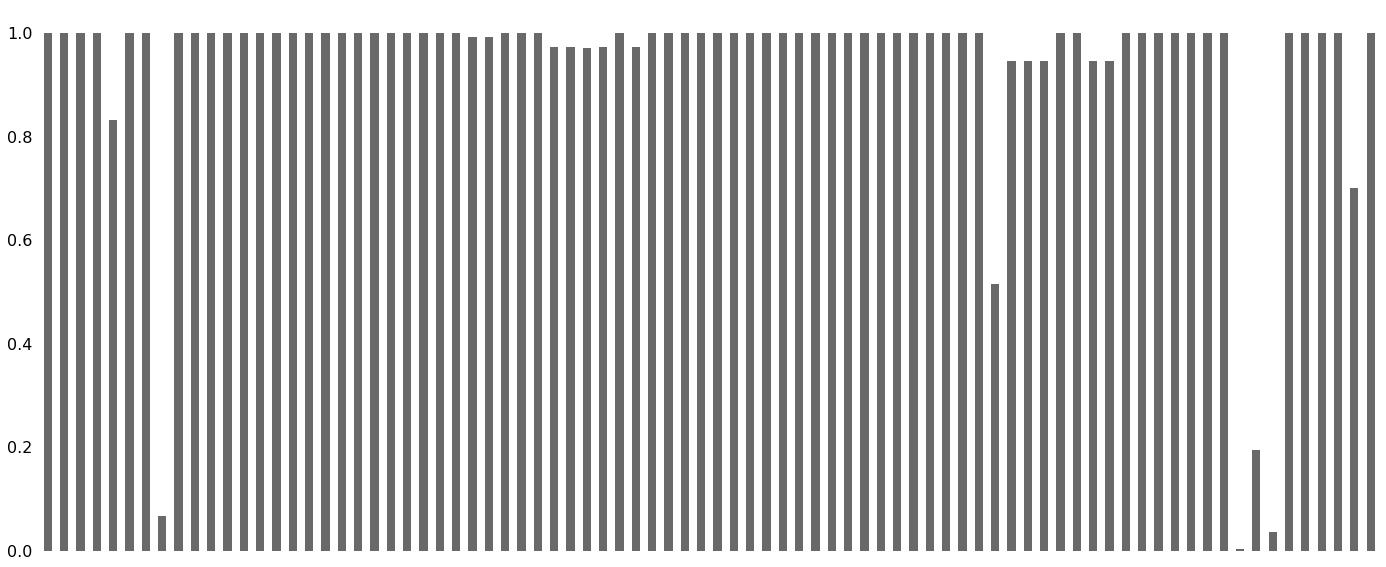

In [418]:
# plot missing values
msno.bar(df)

In [419]:
# list missing values
df.isnull().sum()[df.isnull().sum()>0]

Lot Frontage       490
Alley             2731
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2916
Fence             2357
Misc Feature      2823
SalePrice          878
dtype: int64

The null values for most categories seem to mean that the house does not have that feature. I am going to drop the columns with more than 1k null values and fill the other NaN's with zero

In [420]:
df['total_baths'] = df['Bsmt Full Bath'] + df['Bsmt Half Bath'] + df['Full Bath'] + df['Half Bath']

In [421]:
df = df.drop(columns = ['Garage Cond', 'Garage Qual', 'Mas Vnr Type', 'Functional', 'Heating', 'BsmtFin Type 2', 'Roof Matl', 'Condition 2', 'Utilities', 'Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Misc Feature', 'Fence', 'Pool QC', 'Fireplace Qu', 'Alley', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'])

In [422]:
# update list missing values
df.isnull().sum()[df.isnull().sum()>0]

Lot Frontage      490
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
Total Bsmt SF       1
Electrical          1
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
SalePrice         878
total_baths         2
dtype: int64

In [423]:
# I'm going to fill in missing data points with zero

In [424]:
df = df.fillna(0)

In [425]:
# By graphing the features vs sales price, we can see relationships and outliers. 
# There are two houses with a large lot area and not so high price. I am going to delete those.
# There are also two poins with large living area and large basement sq ft but not so high price. I will also delete those.

In [426]:
# checking rows with high lot area
df[(df['data_type'] == 1) & (df['Lot Area'] > 100000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,data_type,total_baths
471,2116,906426060,50,RL,0.0,159000,Pave,IR2,Low,CulDSac,...,0,0,0,500,6,2007,WD,277000.0,1,3.0
694,2072,905301050,20,RL,0.0,115149,Pave,IR2,Low,CulDSac,...,0,0,0,0,6,2007,WD,302000.0,1,3.0


In [427]:
# checking rows with large living area
df[(df['data_type'] == 1) & (df['Gr Liv Area'] > 4000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,data_type,total_baths
960,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,Corner,...,0,0,480,0,1,2008,New,160000.0,1,5.0
1885,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,Inside,...,0,0,0,17000,10,2007,New,183850.0,1,5.0


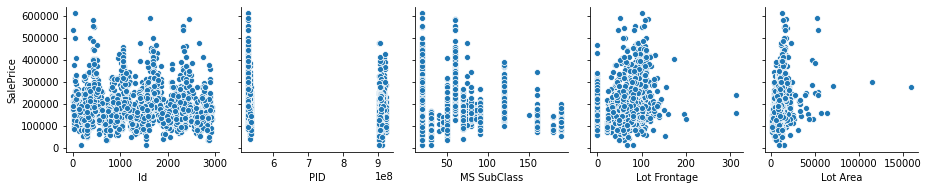

In [428]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area'], y_vars = ['SalePrice']);

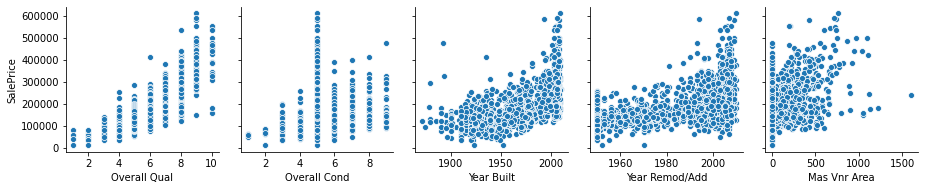

In [429]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area'], y_vars = ['SalePrice']);

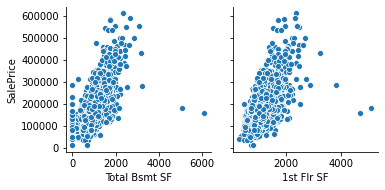

In [430]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Total Bsmt SF', '1st Flr SF'], y_vars = ['SalePrice']);

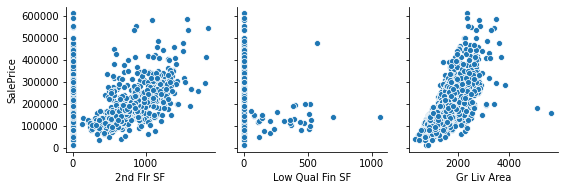

In [431]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area'], y_vars = ['SalePrice']);

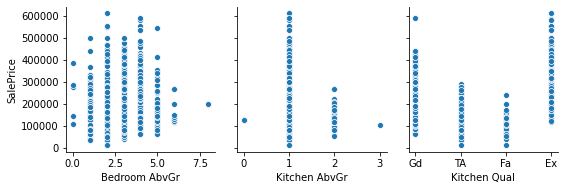

In [432]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual'], y_vars = ['SalePrice']);

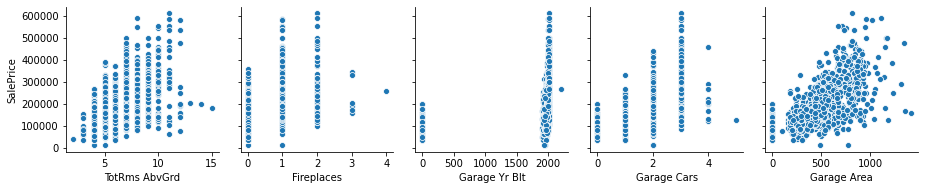

In [433]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area'], y_vars = ['SalePrice']);

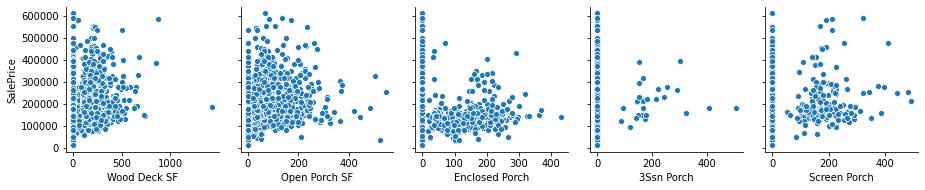

In [434]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], y_vars = ['SalePrice']);

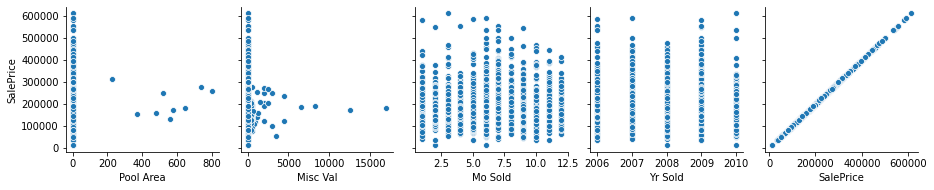

In [435]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'], y_vars = ['SalePrice']);


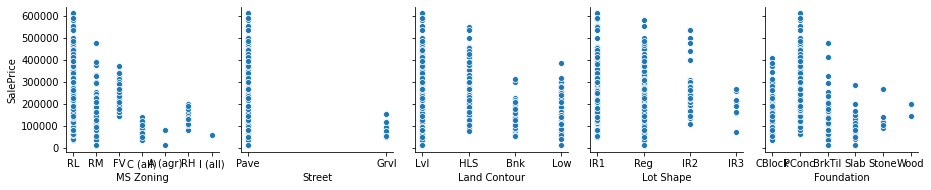

In [436]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['MS Zoning', 'Street', 'Land Contour', 'Lot Shape', 'Foundation'], y_vars = ['SalePrice']);
#'Alley' can't be graphed since it has mix of floats and strings.

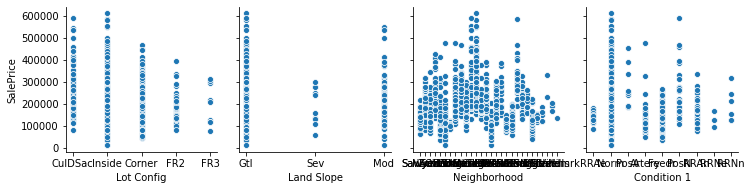

In [437]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1'], y_vars = ['SalePrice']);

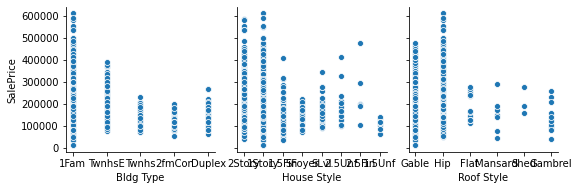

In [438]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Bldg Type', 'House Style', 'Roof Style'], y_vars = ['SalePrice']);

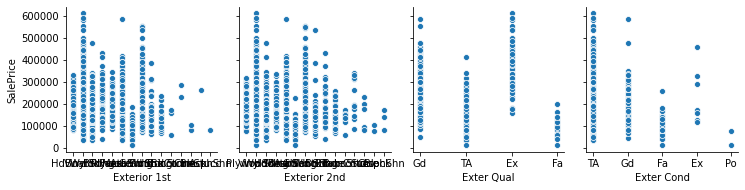

In [439]:
sns.pairplot(df[df['data_type'] == 1], x_vars = ['Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond'], y_vars = ['SalePrice']);

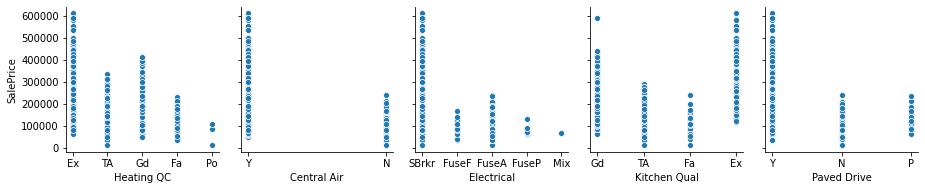

In [440]:
sns.pairplot(df[df['data_type'] == 1], x_vars = [ 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Paved Drive'], y_vars = ['SalePrice']);

In [441]:
#I am going to dummify my string variables
      
df = pd.get_dummies(df, columns = ['Mo Sold', 'Yr Sold', 'MS Zoning', 'Lot Shape', 'Land Contour',
                                   'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
                                   'Bldg Type', 'House Style', 'Roof Style', 'Street',
                                   'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 
                                   'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
                                   'Heating QC', 'Central Air', 'Electrical', 'Sale Type',
                                   'Kitchen Qual', 'Paved Drive', 'Garage Type', 'Garage Finish', ])


# df = pd.get_dummies(df, columns = ['Mo Sold', 'Yr Sold', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 
#                                    'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 
#                                    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
#                                    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 
#                                    'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
#                                    'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 
#                                    'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual',
#                                    'Garage Cond', 'Paved Drive', 'Sale Type'])

In [442]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [443]:
df_X = df[df['data_type'] == 1].copy()
df_X_submit = df[df['data_type'] == 0].copy()
df_y = df[df['data_type'] == 1]['SalePrice'].copy()

df_X = df_X.drop(columns = ['data_type', 'SalePrice'])
df_X = df_X.drop(index = [694, 471, 960, 1885])
df_y = df_y.drop(index = [694, 471, 960, 1885])
df_X_submit = df_X_submit.drop(columns = ['data_type', 'SalePrice'])

In [461]:
df_X.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_0,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,1,0,0,0,0,0,0,1,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,1,0,0,0,0,0,0,1,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,1,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,1,0,0,0,1,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,1,0,0,0,1


In [444]:
# #I am going to add interactions to my df using PolynomialFeatures
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# df_overfit_train = poly.fit_transform(df_X)
# df_overfit_test = poly.fit_transform(df_X_submit)

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
df_overfit_train = df_X
df_overfit_test = df_X_submit

In [445]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(df_overfit_train, df_y, test_size=0.33, random_state = 42)
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [446]:
# Standard Scalar, though it's not recommended to do on encoded
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [447]:
# Set up a list of Lasso alphas to check.

l_alphas = [1, 0.1, 0.001, 0.0005]
#l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train_log)

/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv='warn', eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [448]:
print(lasso_cv.score(Z_train, y_train_log))
print(lasso_cv.score(Z_test, y_test_log))

0.9462860546764313
0.8595921867011741


In [449]:
y_pred_train = lasso_cv.predict(Z_train)
y_pred_test = lasso_cv.predict(Z_test)

In [450]:
mse_train = metrics.mean_squared_error(np.exp(y_train_log), np.exp(y_pred_train))
rmse_train = np.sqrt(mse_train)
rmse_train

17845.522577885946

In [451]:
mse_test = metrics.mean_squared_error(np.exp(y_test_log), np.exp(y_pred_test))
rmse_test = np.sqrt(mse_test)
rmse_test

20802.458433005417

In [452]:
lasso_cv.alpha_

0.001

In [455]:
Z_submit = sc.transform(df_X_submit)
y_pred_submit = lasso_cv.predict(Z_submit)

print(y_pred_submit.shape)
print(y_pred_submit)


(878,)
[11.89441943 12.00694924 12.27087245 11.54524787 12.07315006 11.46223749
 11.61307341 11.97274029 12.12775552 12.0355992  11.93720493 11.73330123
 11.87582781 12.67301521 11.45609408 11.6362722  11.95217519 11.6353576
 12.20296662 11.98359086 11.93930234 11.76991011 12.14259352 12.0025683
 12.07846653 11.75558053 11.66411897 11.56114844 12.02863764 11.19677215
 11.64027597 11.52774476 12.05578688 11.93276102 12.29683908 12.07021736
 11.63383685 11.4755773  11.7419993  12.1032784  11.97821695 12.22813947
 11.90437557 11.96877961 12.23761225 11.44993291 12.28992358 11.72261369
 11.84199119 11.71863499 11.59833631 12.1109916  12.37777629 11.74559502
 11.583477   11.98399439 11.98116737 11.84595228 11.91775654 12.34403884
 12.6207289  11.70132786 11.86780791 12.07388313 12.028087   12.61015034
 11.46907386 12.12925746 11.39091866 11.90909314 11.47538081 12.83152667
 12.27477433 12.01674908 11.88619186 12.13880305 11.81104064 11.8622315
 11.62356864 12.80054596 12.18771323 11.5523544

/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [456]:
Answer = pd.DataFrame(house_test['Id'])
Answer['SalePrice'] = np.exp(y_pred_submit)
Answer.tail()

,Id,SalePrice
873,1662,188283.451017
874,1234,206268.595723
875,1373,129762.038134
876,1672,116663.937058
877,1939,118746.195951


In [457]:
Answer.to_csv('../datasets/submit_6.csv', index = False)

In [458]:
check = pd.read_csv('../datasets/submit_1.csv')
check.shape

(878, 2)

In [460]:
check.head()

,Id,SalePrice
0,2658,133104.299690
1,2718,127250.965375
2,2414,222519.788560
3,1989,142880.159166
4,625,165988.535724


In [370]:
lasso_cv.alpha_

0.001

In [ ]:
0.005336699231206312

In [517]:
model = sm.OLS(df_y, df_X).fit()
model.summary()

/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/RoxanaRuvalcaba/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     99.40
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:26:56   Log-Likelihood:                -23282.
No. Observations:                2051   AIC:                         4.707e+04
Df Residuals:                    1800   BIC:                         4.848e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Id                     -18.1732      9.638     -1.886      0.060     -37.076       0.729
PID                   1.866e-05   9.91e-06      1.882      0.060   -7.88e-07    3.81e-05
MS SubClass            -78.0970     62.816     -1.243      0.214    -201.297      45.103
Lot Frontage            20.1920     19.314      1.045      0.296     -17.688      58.072
Lot Area                 0.7474      0.119      6.260      0.000       0.513       0.981
Overall Qual          6577.2910    805.110      8.169      0.000    4998.242    8156.340
Overall Cond          5373.5867    705.961      7.612      0.000    3988.997    6758.176
Year Built             279.5301     61.109      4.574      0.000     159.678     399.382
Year Remod/Add          56.7488     45.387      1.250      0.211     -32.268     145.766
Mas Vnr Area            18.0228      4.868      3.702      0.000       8.475      27.570
BsmtFin SF 1            13.7458      2.144      6.410      0.000       9.540      17.952
BsmtFin SF 2             9.7655      4.449      2.195      0.028       1.039      18.492
Bsmt Unf SF             -2.2282      2.034     -1.095      0.273      -6.217       1.761
Total Bsmt SF           21.2832      2.893      7.356      0.000      15.609      26.958
1st Flr SF              12.2116      4.196      2.910      0.004       3.982      20.441
2nd Flr SF              22.5889      3.791      5.959      0.000      15.155      30.023
Low Qual Fin SF         -4.1972      8.854     -0.474      0.636     -21.562      13.168
Gr Liv Area             30.6031      3.818      8.016      0.000      23.115      38.091
Bsmt Full Bath        3448.1981   1534.772      2.247      0.025     438.077    6458.319
Bsmt Half Bath       -3429.2544   2272.952     -1.509      0.132   -7887.156    1028.647
Full Bath             4433.8898   1700.632      2.607      0.009    1098.469    7769.311
Half Bath             2574.6703   1622.720      1.587      0.113    -607.943    5757.284
Bedroom AbvGr        -1942.4332   1039.321     -1.869      0.062   -3980.836      95.970
Kitchen AbvGr        -1.022e+04   4890.296     -2.090      0.037   -1.98e+04    -631.795
TotRms AbvGrd          235.4285    733.517      0.321      0.748   -1203.206    1674.063
Fireplaces            3400.5484   1086.842      3.129      0.002    1268.945    5532.152
Garage Yr Blt            1.3583     44.988      0.030      0.976     -86.876      89.593
Garage Cars           3932.7361   1853.320      2.122      0.034     297.852    7567.621
Garage Area             14.0013      6.481      2.160      0.031       1.291      26.712
Wood Deck SF            11.5091      4.646      2.477      0.013       2.398      20.621
Open Porch SF           -3.2854      9.029     -0.364      0.716     -20.993      14.423
Enclosed Porch          11.1153     10.026      1.109    